In [1]:
import numpy as np


a=np.array([0.3,0.35,0.1]); aa=np.tile(a,(len(a),1)) 
b=np.array([[0.3,0.5,0.2],[0.2,0.2,0.4],[0.3,0.4,0.2]])
c=np.minimum(aa.T,b)  #两个矩阵的元素对应取最小值
T=c.max(axis=0)  #矩阵逐列取最大值
print("T=",T)

T= [0.3  0.3  0.35]


In [3]:
import numpy as np


a=np.array([[0.4,0.3,0.5,0.3],[0.3,0.3,0.4,0.4],[0.2,0.3,0.3,0.3]])
b=np.array([0.2,0.3,0.4,0.3]); N=[]
for i in range(len(a)):
    N.append(1-(np.linalg.norm(a[i]-b))/2)
print("贴近度分别为：",N)

贴近度分别为： [0.8881966011250105, 0.9292893218813453, 0.95]


[[1.  0.1 0.8 0.5 0.3]
 [0.1 1.  0.1 0.2 0.4]
 [0.8 0.1 1.  0.3 0.1]
 [0.5 0.2 0.3 1.  0.6]
 [0.3 0.4 0.1 0.6 1. ]]

------------------------
 [[1.  0.4 0.8 0.5 0.5]
 [0.4 1.  0.4 0.4 0.4]
 [0.8 0.4 1.  0.5 0.5]
 [0.5 0.4 0.5 1.  0.6]
 [0.5 0.4 0.5 0.6 1. ]]


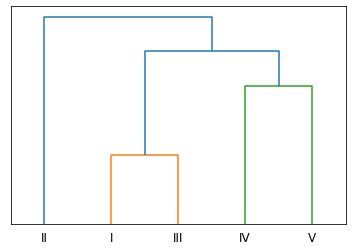

In [4]:
from numpy import array, zeros, triu
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
def hecheng(a,b):
    m,N=a.shape; n=b.shape[1]; c=zeros((m,n))
    for i in range(m):
        for j in range(n):
            c[i,j]=max([min(a[i,k],b[k,j]) for k in range(N)])
    return c
a=array([[5,5,3,2],[2,3,4,5],[5,5,2,3],[1,5,3,1],[2,4,5,1]])
d=array([[sum(abs(a[i]-a[j])) for i in range(5)] for j in range(5)])
r=1-0.1*d; print(r); tr=hecheng(r,r)
while abs(r-tr).sum()>0.00001: r=tr; tr=hecheng(r,r)
print('\n------------------------\n',tr)
d2=1-tr  #为了画图，再次转换为距离关系
d2=triu(d2,1); d2=d2[d2!=0] #提取矩阵上三角中的非零元素
z=sch.linkage(d2); s=['I','II','III','IV','V']
sch.dendrogram(z,labels=s)  #画聚类树
plt.yticks([])  #y轴不可见
plt.show()

In [5]:
import numpy as np



d=np.array([[4,2,1,0,0],[6,1,0,0,0],[0,0,5,1,1],[2,2,1,1,1]])
r=d/7; w1=np.array([0.2,0.5,0.1,0.2])
w2=np.array([0.2,0.1,0.5,0.2])
a1=np.dot(w1,r); a2=np.dot(w2,r)
print(a1,'\n---------------------------------------\n',a2)


[0.6        0.18571429 0.12857143 0.04285714 0.04285714] 
---------------------------------------
 [0.25714286 0.12857143 0.41428571 0.1        0.1       ]


In [6]:
from numpy import array, piecewise, c_



d=array([[592.5,3,55,72,5],[529,2,38,105,3],[412,1,32,85,2]]); d=d.T
c1=lambda x: piecewise(x, [(350<x) & (x<600),  x>=600], [lambda x:(x-350)/250., 1])
c2=lambda x: piecewise(x, [(1.0<x) & (x<6.0), (x<=1.0)],[lambda x:1-(x-1)/5.0,1])
c3=lambda x: piecewise(x, [(20<x) & (x<60), x<=20], [lambda x:1-(x-20)/40., 1])
c4=lambda x: piecewise(x, [(50<x) & (x<130), x>=130], [lambda x:(x-50)/80., 1])
c5=lambda x: piecewise(x, [(1<x) & (x<6), x<=1], [lambda x:1-(x-1)/5., 1])
r=c_[c1(d[0]),c2(d[1]),c3(d[2]),c4(d[3]),c5(d[4])].T
w=array([0.2, 0.1, 0.15, 0.3, 0.25]);
A=w.dot(r); print('R=',r,'\n---------------------------\n','A=',A)


R= [[0.97   0.716  0.248 ]
 [0.6    0.8    1.    ]
 [0.125  0.55   0.7   ]
 [0.275  0.6875 0.4375]
 [0.2    0.6    0.8   ]] 
---------------------------
 A= [0.40525 0.66195 0.58585]
